# Insurance Forecast by using Linear Regression

## Challenge

* An insurance provider in United States wants to estimate the insurance cost of an individual given certain factors.
* In United States, it is often mandatory to inform the insurance provider about the ailments, BMI, whether a person is smoker or not, number of dependents, the region that they belong to, etc.
* Your job as a data scientist is to figure out, which factors end up costing more to the insurance providers.

## Data description

* age: age of primary beneficiary
* sex: insurance contractor gender, female, male
* bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
* children: Number of children covered by health insurance / Number of dependents
* smoker: Smoking
* region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
* charges: Individual medical costs billed by health insurance

## Business Metrics

* Minimise the cost incurred on the insurance provider.
* Understand risky customers.

## Setup and Data Preparation:
- Import necessary libraries such as `pandas`, `matplotlib`, `seaborn`, and `scikit-learn`.  
- Load the dataset for regression analysis.  
- Conduct exploratory data analysis (EDA) to understand the dataset.  
- Preprocess the data by handling missing values, encoding categorical variables, and normalizing/standardizing features if needed.  

In [ ]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *

In [ ]:
# Load the dataset
insurance_df = pd.read_csv('insurance.csv')

# Display the first few rows to understand the data structure
display(insurance_df.head())

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# Check for missing values
missing_values_exist = insurance_df.isnull().sum().any()
print(f"Are there any missing values? {missing_values_exist}")

Are there any missing values? False


In [ ]:
# Check for duplicate rows
duplicate_rows_exist = insurance_df.duplicated().sum().any()
print(f"Are there any duplicate rows? {duplicate_rows_exist}")

Are there any duplicate rows? True


In [ ]:
# Remove duplicate rows
# Check if duplicates exist before attempting to drop
if insurance_df.duplicated().sum() > 0:
    insurance_df.drop_duplicates(inplace=True)
    print("Duplicate rows removed.")
else:
    print("No duplicate rows found.")

Duplicate rows removed.


In [ ]:
# Verify that duplicate rows have been removed
duplicate_rows_exist_after_drop = insurance_df.duplicated().sum().any()
print(f"Are there any duplicate rows after removal? {duplicate_rows_exist_after_drop}")

Are there any duplicate rows after removal? False


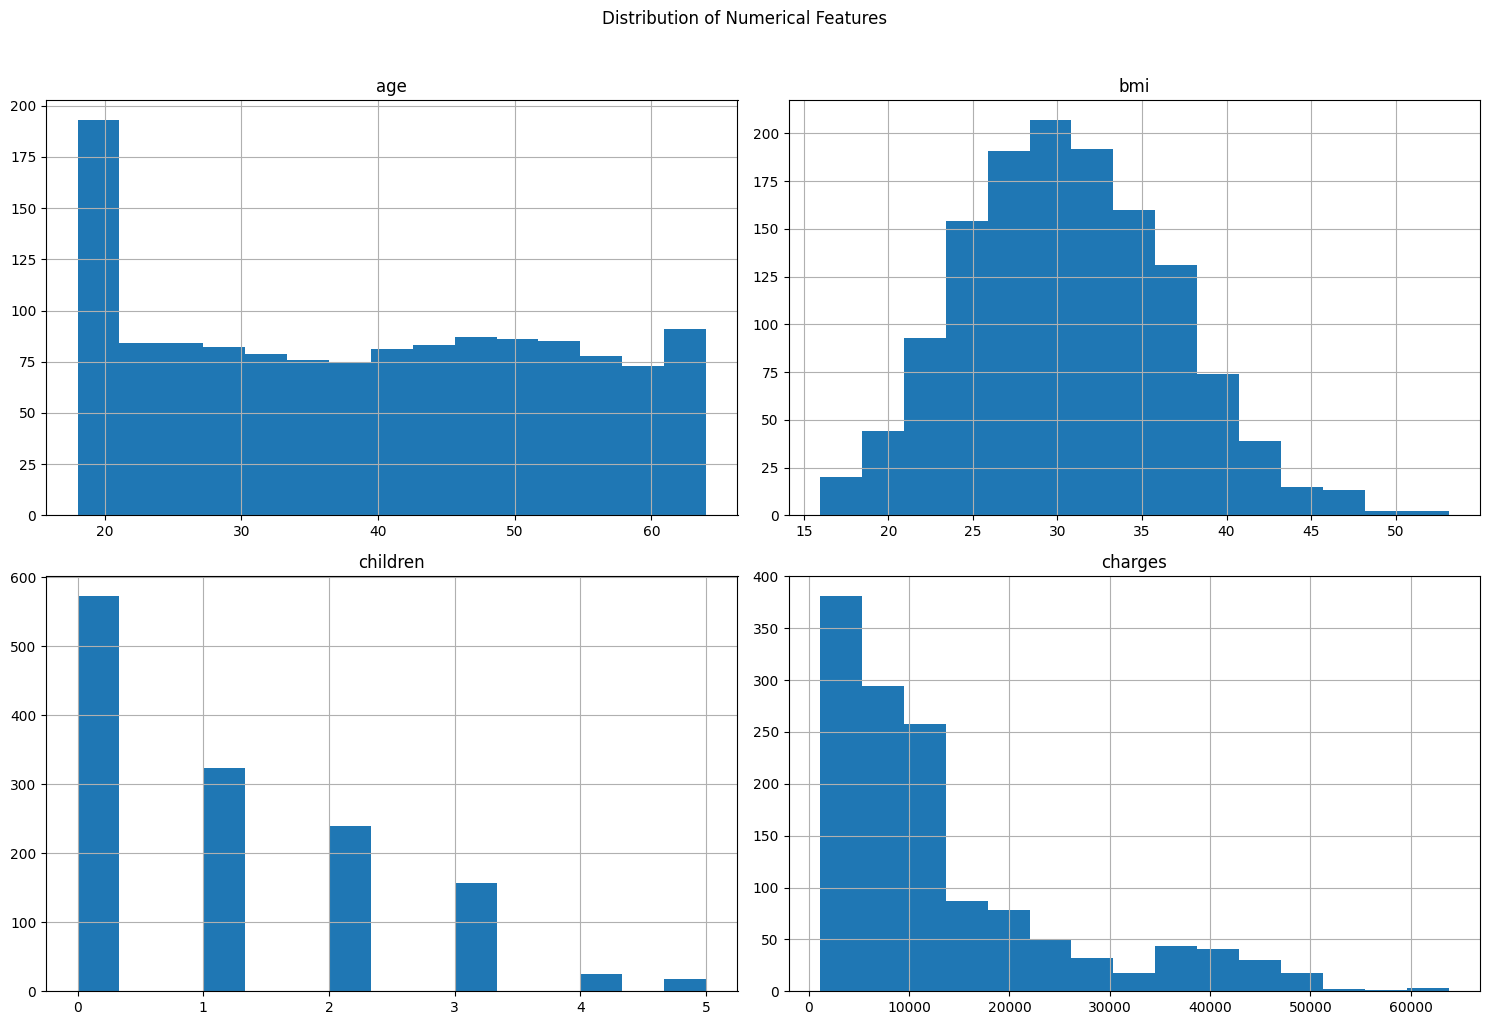

In [ ]:
# Visualize distribution of numerical features
numerical_features = ['age', 'bmi', 'children', 'charges']
insurance_df[numerical_features].hist(bins=15, figsize=(15, 10))
plt.suptitle('Distribution of Numerical Features', y=1.02)
plt.tight_layout()
plt.show()

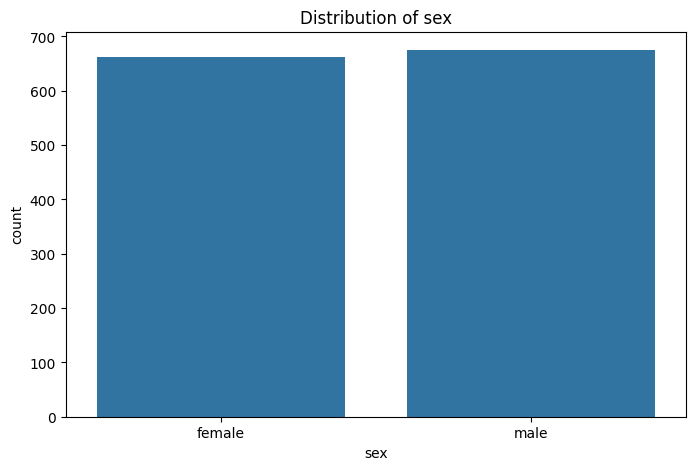

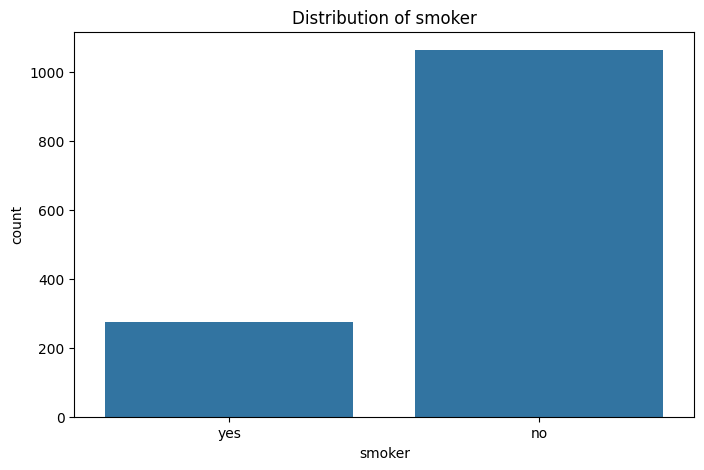

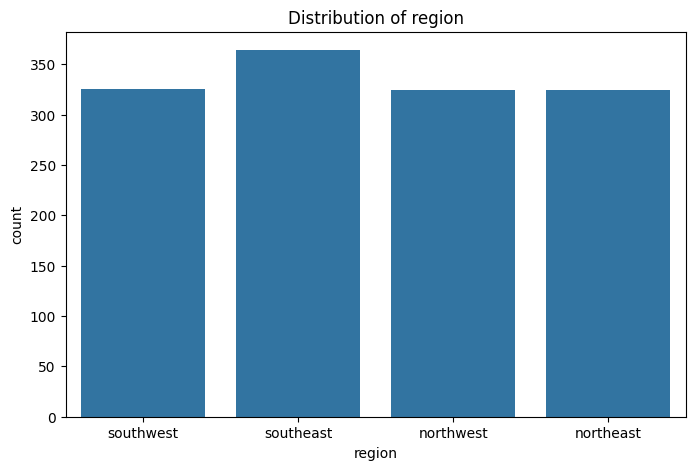

In [ ]:
# Visualize distribution of categorical features
categorical_features = ['sex', 'smoker', 'region']
for col in categorical_features:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=col, data=insurance_df)
    plt.title(f'Distribution of {col}')
    plt.show()

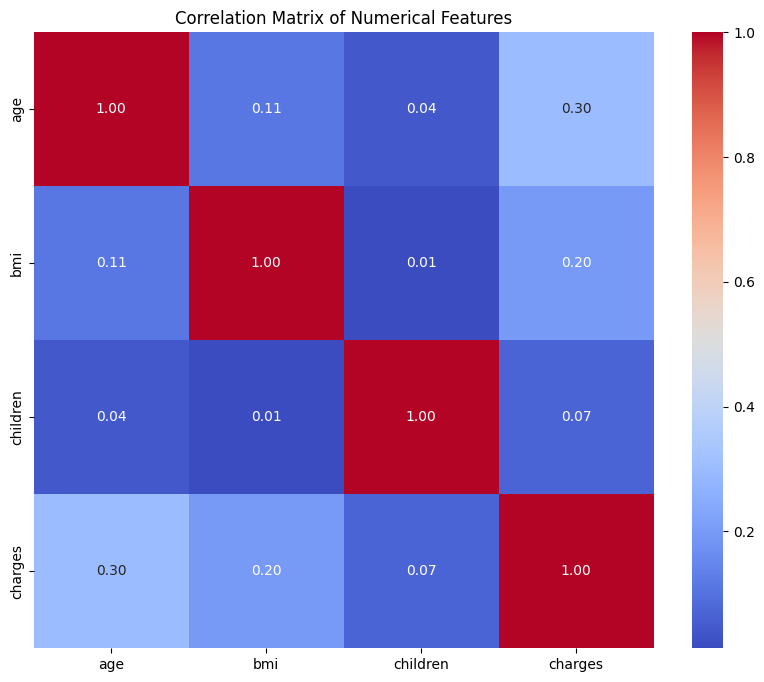

In [ ]:
# Check for correlations between numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(insurance_df[numerical_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

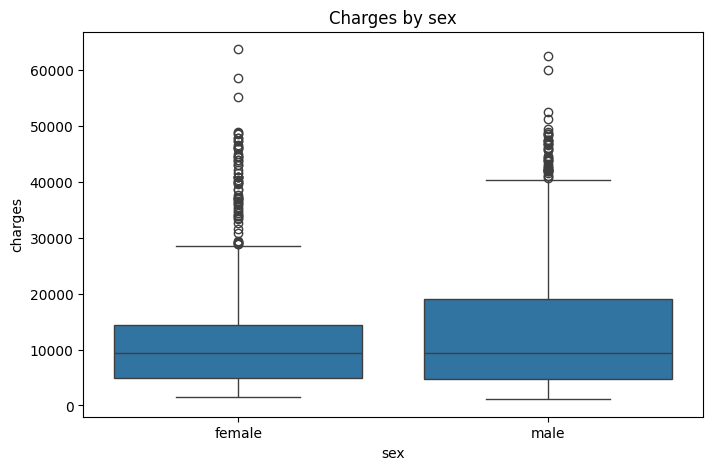

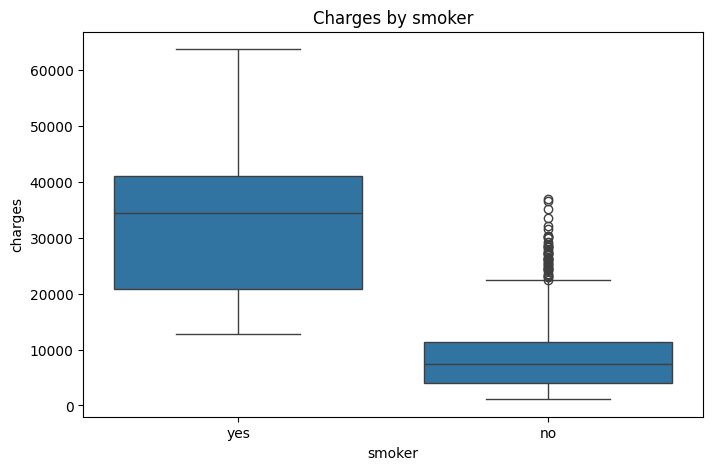

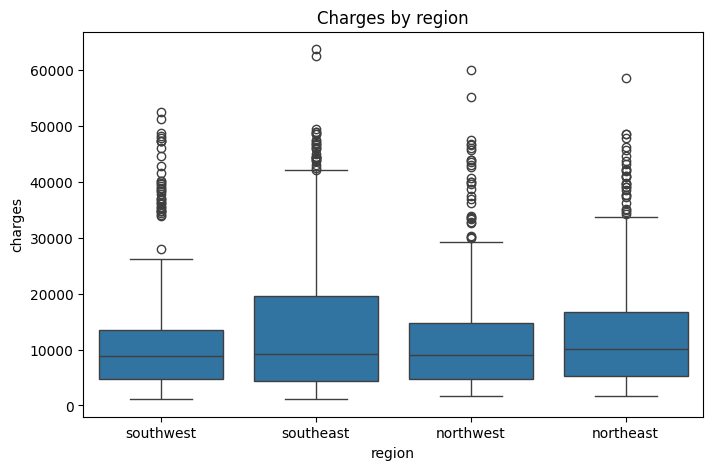

In [ ]:
# Visualize relationship between categorical features and charges
categorical_features = ['sex', 'smoker', 'region']
for col in categorical_features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=col, y='charges', data=insurance_df)
    plt.title(f'Charges by {col}')
    plt.show()

In [ ]:
# Encode categorical variables using one-hot encoding
insurance_df_encoded = pd.get_dummies(insurance_df, columns=['sex', 'smoker', 'region'])
display(insurance_df_encoded.head())

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [ ]:
# Split the data
X = insurance_df_encoded.drop('charges', axis=1)
y = insurance_df_encoded['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data
scaler = scaler.fit(X_train)

# transform the training data
X_train_scaled = X_train.copy() # Create a copy to avoid modifying the original DataFrame
X_train_scaled = scaler.transform(X_train)

# Transform the test data using the fitted scaler
X_test_scaled = X_test.copy() # Create a copy to avoid modifying the original DataFrame
X_test_scaled = scaler.transform(X_test)

print("Features scaled.")

Features scaled.


In [ ]:
# Initialize and train the Linear Regression model with scaled data
import statsmodels.api as sm

linear_model_scaled = LinearRegression()
linear_model_scaled.fit(X_train_scaled, y_train)

print("Linear Regression model trained successfully with scaled data.")

# Make predictions on the scaled test data
y_pred_scaled = linear_model_scaled.predict(X_test_scaled)

# Evaluate the model with scaled data
mse_scaled = mean_squared_error(y_test, y_pred_scaled)
r2_scaled = r2_score(y_test, y_pred_scaled)
mae_scaled = mean_absolute_error(y_test, y_pred_scaled)

# Calculate Adjusted R-squared for the scaled model
# Need to add a constant to the scaled features for statsmodels
X_test_scaled_with_constant = sm.add_constant(X_test_scaled.astype(float)) # Convert boolean to float

# Fit the model using statsmodels to get the number of features
model_stats_scaled = sm.OLS(y_test, X_test_scaled_with_constant).fit()
adjusted_r2_scaled = model_stats_scaled.rsquared_adj


print("\nModel Evaluation with Scaled Data:")
print(f"Mean Squared Error (MSE): {mse_scaled:.2f}")
print(f"R-squared (R2): {r2_scaled:.2f}")
print(f"Mean Absolute Error (MAE): {mae_scaled:.2f}")
print(f"Adjusted R-squared (Adjusted R2): {adjusted_r2_scaled:.2f}")

Linear Regression model trained successfully with scaled data.

Model Evaluation with Scaled Data:
Mean Squared Error (MSE): 35478020.68
R-squared (R2): 0.81
Mean Absolute Error (MAE): 4177.05
Adjusted R-squared (Adjusted R2): 0.82


In [ ]:
# Analyze coefficients of the scaled linear regression model
coefficients = pd.DataFrame({
    'Feature': X_train.columns,  # Use column names from the original DataFrame
    'Coefficient': linear_model_scaled.coef_
})

# Display coefficients, sorted by absolute value for easier interpretation of magnitude
coefficients['Abs_Coefficient'] = abs(coefficients['Coefficient'])
coefficients = coefficients.sort_values(by='Abs_Coefficient', ascending=False).drop('Abs_Coefficient', axis=1)

display(coefficients)

,Feature,Coefficient
5,smoker_no,-4617.171244
6,smoker_yes,4617.171244
0,age,3472.975553
1,bmi,1927.828251
2,children,636.501185
7,region_northeast,204.451816
9,region_southeast,-158.608909
10,region_southwest,-76.910350
8,region_northwest,38.492233
4,sex_male,-25.374837


## Coefficient Analysis Interpretation

Analyzing the coefficients of the scaled linear regression model reveals the estimated impact of each feature on insurance charges:

*   **Smoking status (`smoker_yes`)** has the largest positive coefficient, indicating it is the most significant factor associated with higher insurance costs.
*   **Age** and **BMI** also have substantial positive coefficients, highlighting their strong influence on insurance charges.
*   **Number of children** and **region** have smaller coefficients, suggesting a less significant impact compared to smoking, age, and BMI.
*   **Sex** has the smallest coefficients, indicating it has the least impact on insurance charges in this model.

This analysis confirms that smoking, age, and BMI are the primary drivers of insurance costs according to this linear model.

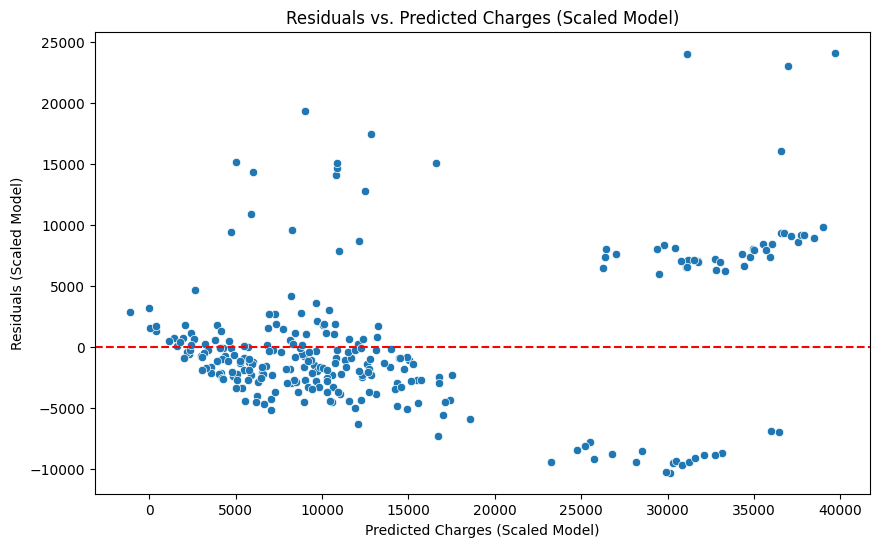

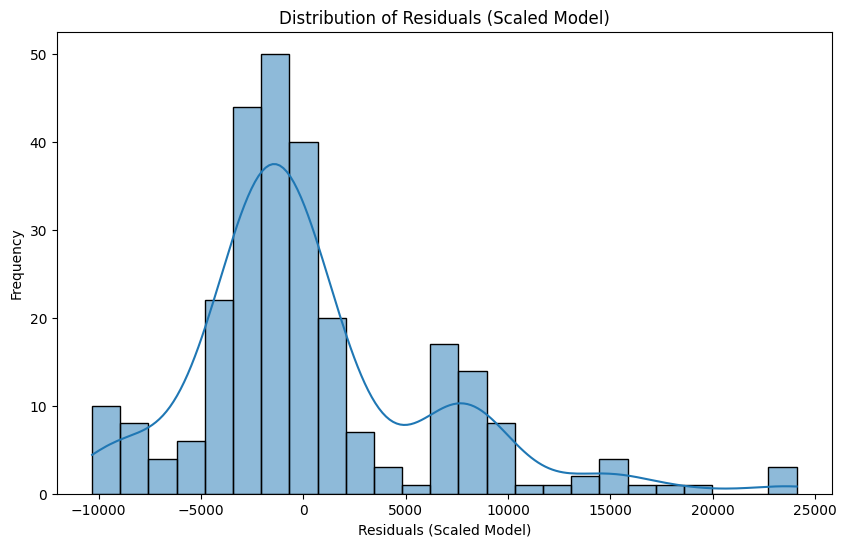

In [ ]:
# Calculate residuals for the scaled model
residuals_scaled = y_test - y_pred_scaled

# Plot residuals vs. predicted values for the scaled model
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_scaled, y=residuals_scaled)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Charges (Scaled Model)')
plt.ylabel('Residuals (Scaled Model)')
plt.title('Residuals vs. Predicted Charges (Scaled Model)')
plt.show()

# Plot distribution of residuals for the scaled model
plt.figure(figsize=(10, 6))
sns.histplot(residuals_scaled, kde=True)
plt.xlabel('Residuals (Scaled Model)')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals (Scaled Model)')
plt.show()

## Residual Analysis Interpretation

The residual analysis using the model trained on scaled features yielded similar results to the unscaled model:

*   **Residuals vs. Predicted Charges:** The scatter plot continues to show a fanning-out pattern, indicating that **heteroscedasticity** is still present. The variance of the residuals increases with predicted charges, suggesting the model's predictions are less reliable for individuals with higher insurance costs, even after scaling the features.
*   **Distribution of Residuals:** The histogram of residuals remains somewhat centered around zero but shows a similar slight skew to the right.

This confirms that scaling the numerical features did not resolve the issue of heteroscedasticity in the linear regression model. This suggests that the limitations of the linear model in capturing the varying spread of the data are not due to the scale of the features but likely related to the inherent relationships in the data that a simple linear model cannot fully capture.